### Installing prerequisites

In [ ]:
# installing dependencies
!pip install scipy
!pip install scikit-learn
!pip install scikit-image
!pip install tensorflow
!pip install Keras

# the output will be cleared after installation
from IPython.display import clear_output
clear_output()

### Importing libraries

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D,Dropout
import numpy as np
from skimage import io,transform
import glob,os
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Loading training and test data

In [2]:
train_image=glob.glob("train/*.png")
test_image=glob.glob("test/*.png")

In [3]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for image in train_image:
    img=io.imread(image)
    img=transform.resize(img,(128,128), mode = 'constant')
    X_train.append(img)
    y_train.append(image[-6:-4])
for image in test_image:
    img=io.imread(image)
    img=transform.resize(img,(128,128), mode = 'constant')
    X_test.append(img)
    y_test.append(image[-6:-4])    
      

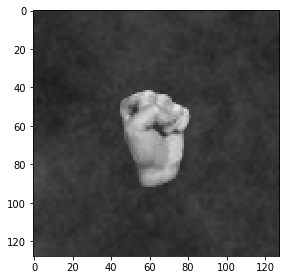

0L


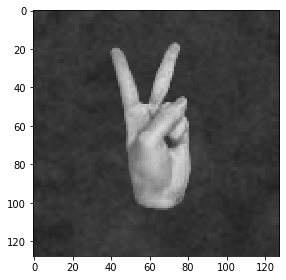

2L


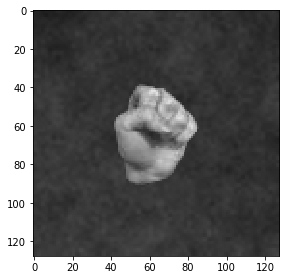

0L


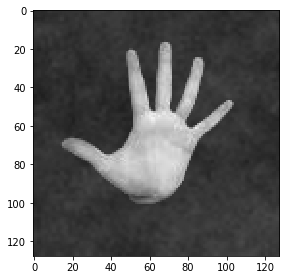

5L


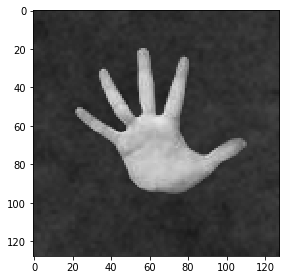

5R


In [4]:
for i in range(1,6):
    io.imshow(X_train[i])
    plt.show()
    print(y_train[i])
    

In [5]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape,X_test.shape)

(18000, 128, 128, 1) (3600, 128, 128, 1)


In [6]:
label_to_int={
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 6,
    '1L' : 7,
    '2L' : 8,
    '3L' : 9,
    '4L' : 10,
    '5L' : 11
}
temp = []
for label in y_train:
    temp.append(label_to_int[label])
y_train = temp.copy()

temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test = temp.copy()

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 12)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 12)

In [7]:
model=Sequential()
model.add(Conv2D(32,(4,4),activation="relu",input_shape=(128,128,1)))
model.add(Conv2D(32,(4,4),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))




model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(12, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 125, 125, 32)      544       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 207936)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 207936)           

In [8]:
len(y_train)
model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train,batch_size=64,validation_data=(X_test,y_test),epochs=5)
model.save("model.h5")

Train on 18000 samples, validate on 3600 samples
Epoch 1/5
18000/18000 [==============================] - 311s 17ms/step - loss: 0.7712 - accuracy: 0.7491 - val_loss: 0.1476 - val_accuracy: 0.9622
Epoch 2/5
18000/18000 [==============================] - 275s 15ms/step - loss: 0.0720 - accuracy: 0.9764 - val_loss: 0.0494 - val_accuracy: 0.9800
Epoch 3/5
18000/18000 [==============================] - 275s 15ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0888 - val_accuracy: 0.9725
Epoch 4/5
18000/18000 [==============================] - 277s 15ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/5
18000/18000 [==============================] - 276s 15ms/step - loss: 0.0162 - accuracy: 0.9941 - val_loss: 0.0042 - val_accuracy: 0.9986
